   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

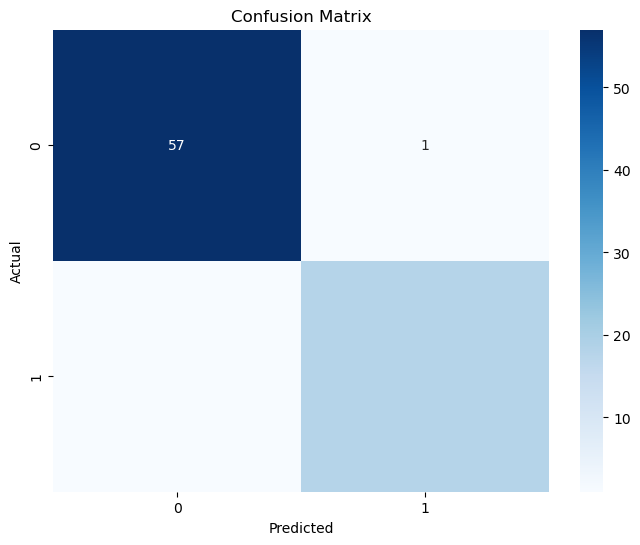

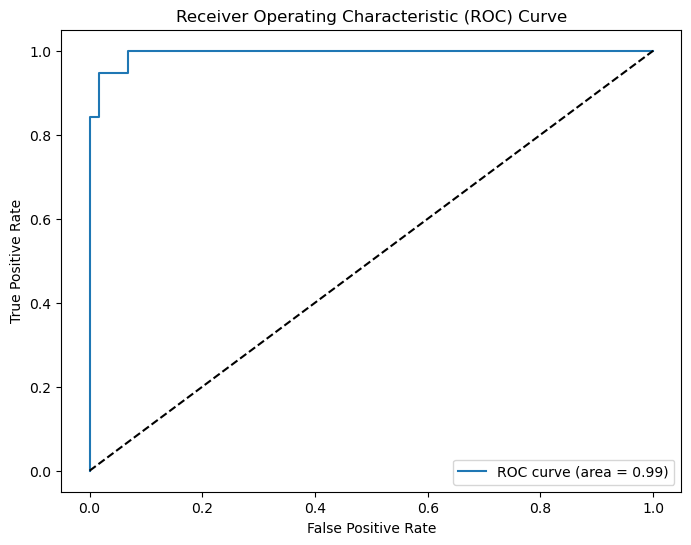

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('thyroid_Diff.csv')
print(data.head())


label_encoder = LabelEncoder()
data['Recurred'] = label_encoder.fit_transform(data['Recurred'])

categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Stage', 'Response', 'T', 'N', 'M']
numerical_features = ['Age']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X = data.drop(columns=['Recurred'])
y = data['Recurred']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_binary = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'ROC-AUC: {roc_auc}')


def predict_recurrence(features):
    features_df = pd.DataFrame([features])
    prediction_proba = model.predict_proba(features_df)[:, 1]
    return prediction_proba


input_features = {
    'Age': 45,
    'Gender': 'Female',
    'Smoking': 'Yes',
    'Hx Smoking': 'Yes',
    'Hx Radiothreapy': 'Yes',
    'Thyroid Function': 'Normal',
    'Physical Examination': 'Normal',
    'Adenopathy': 'Absent',
    'Pathology': 'Papillary',
    'Focality': 'Single',
    'Risk': 'High',
    'T': 'T2',
    'N': 'N0',
    'M': 'M0',
    'Stage': 'I',
    'Response': 'Complete'
}

recurrence_prediction = predict_recurrence(input_features)
print(f'Recurrence Prediction: {recurrence_prediction[0]*100:.2f}%')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<Figure size 1500x1000 with 0 Axes>

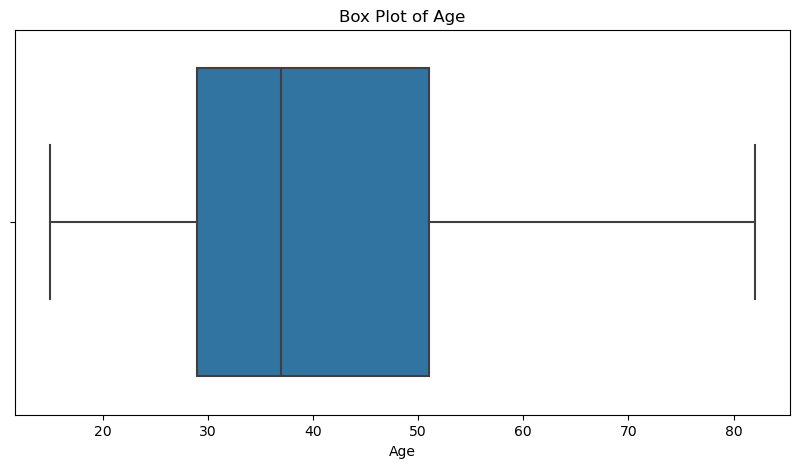

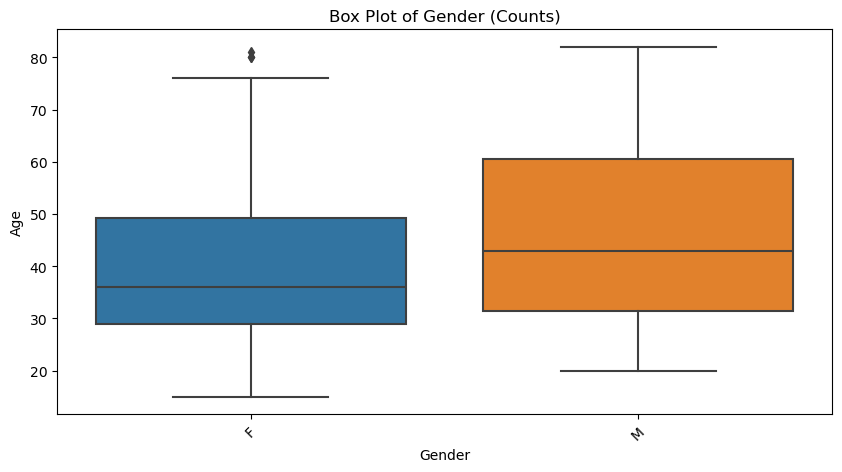

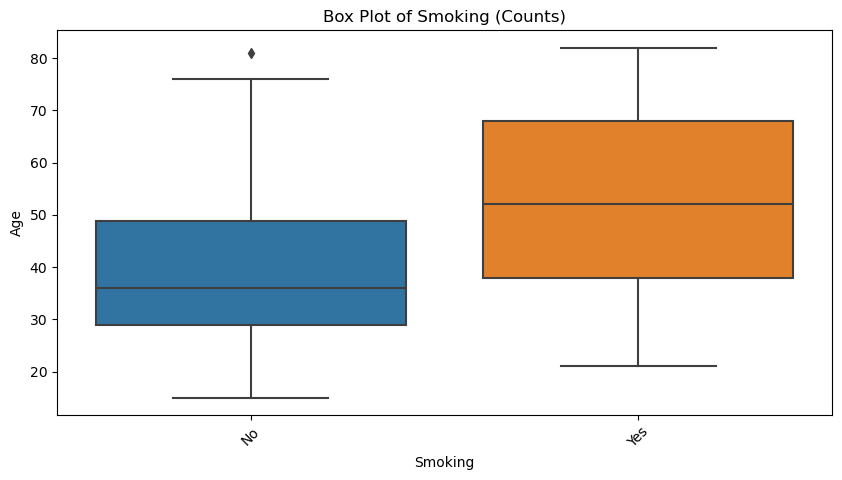

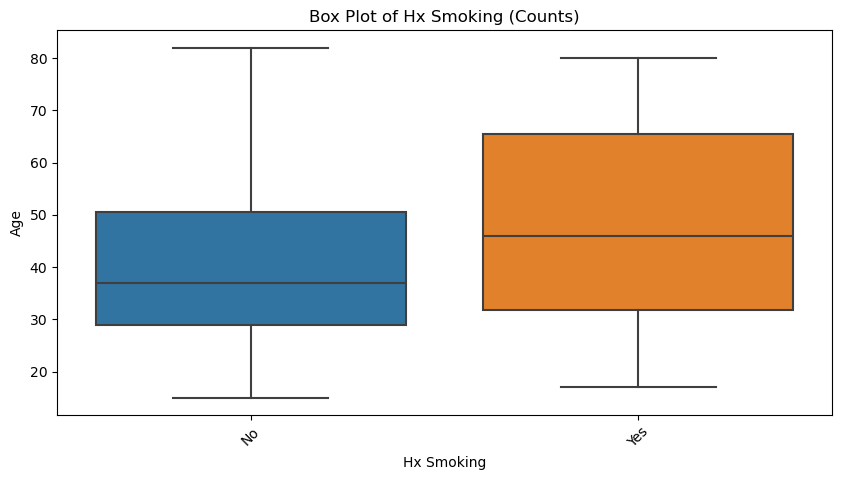

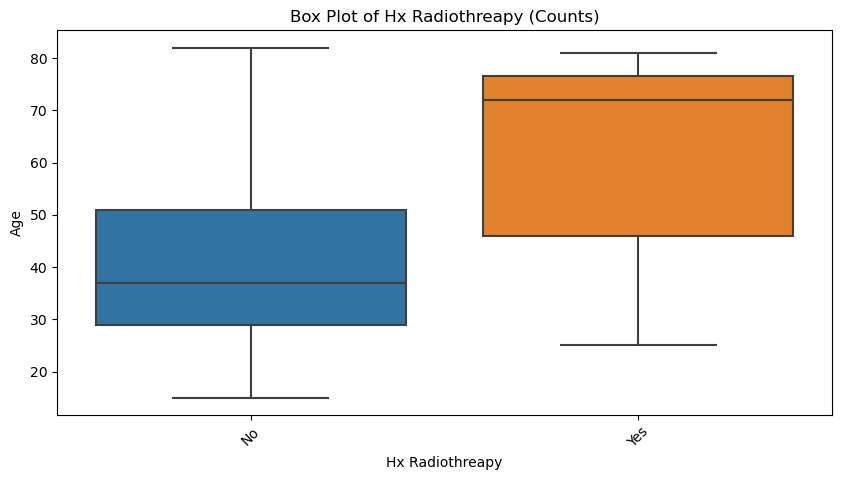

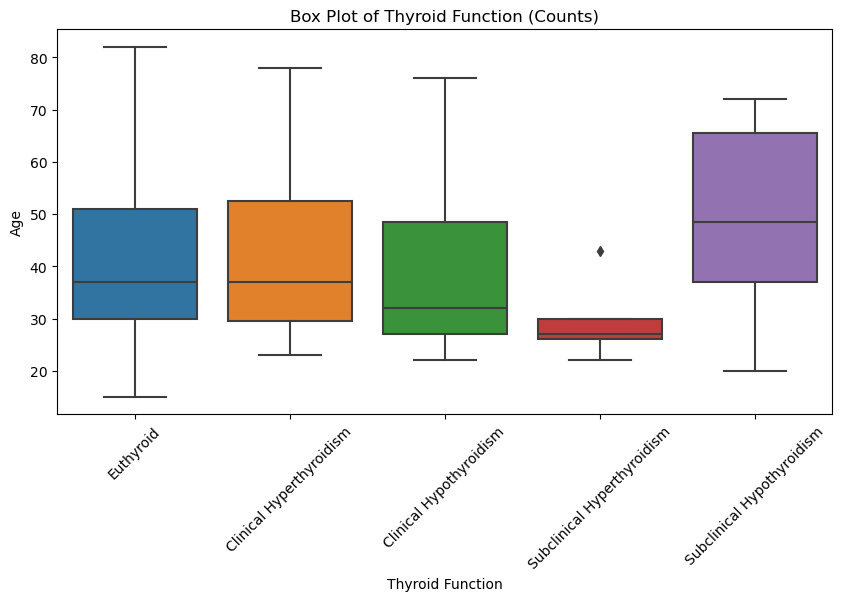

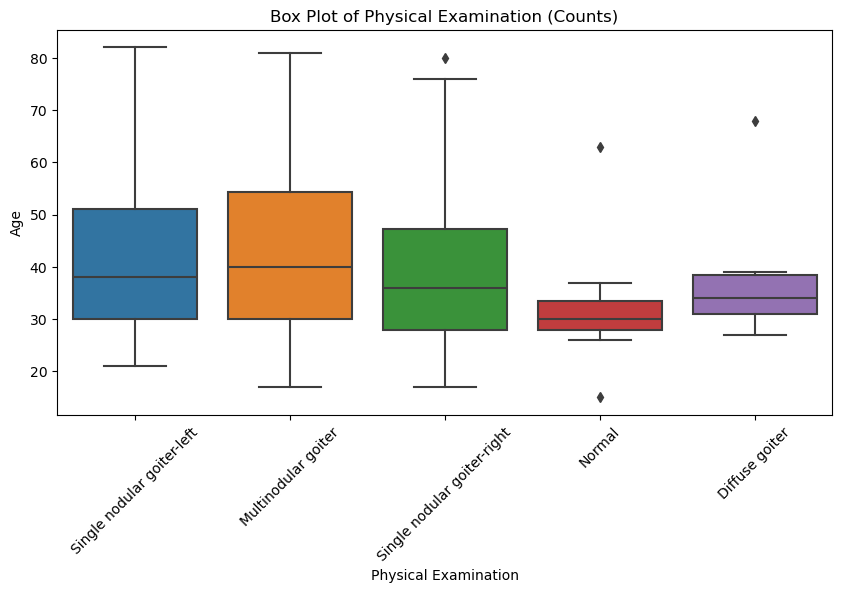

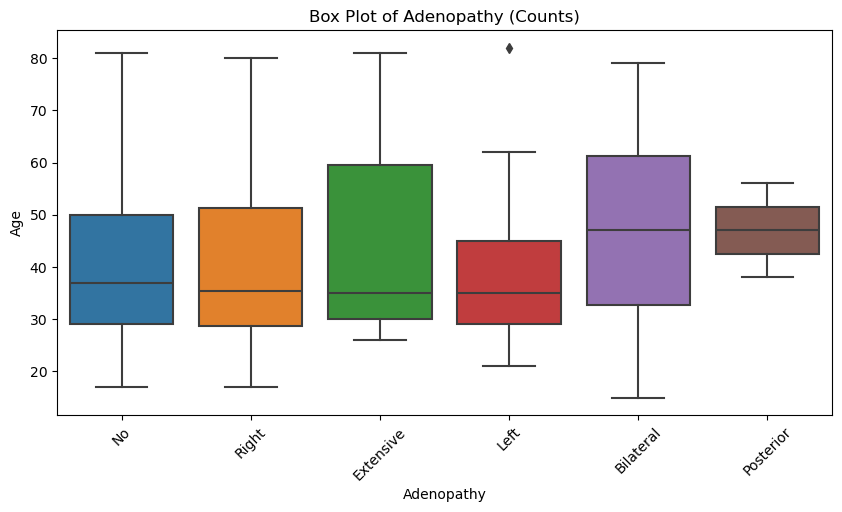

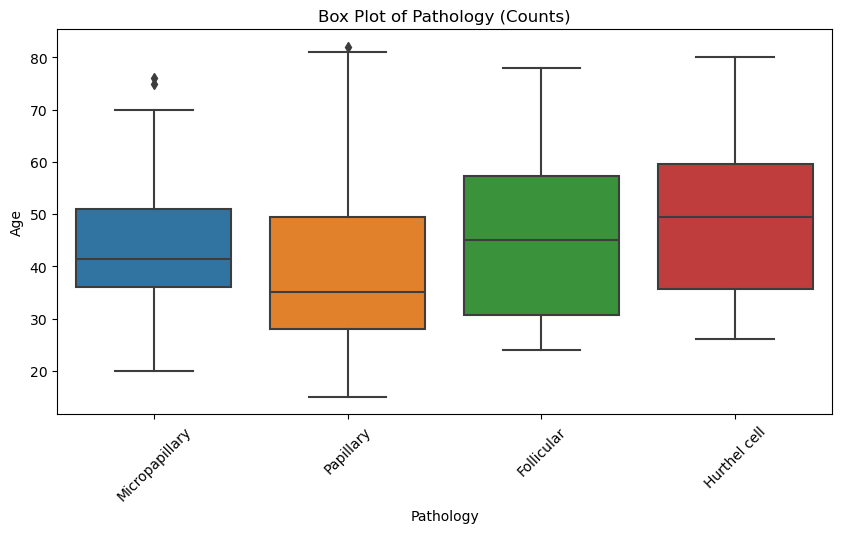

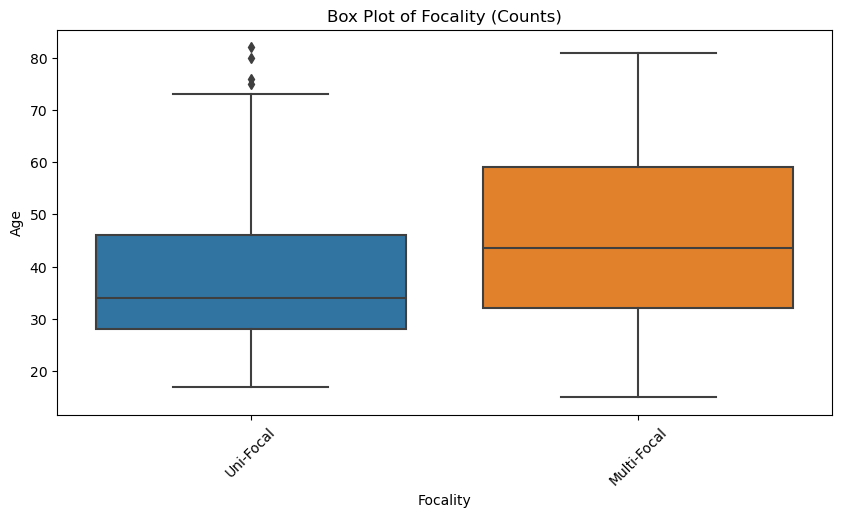

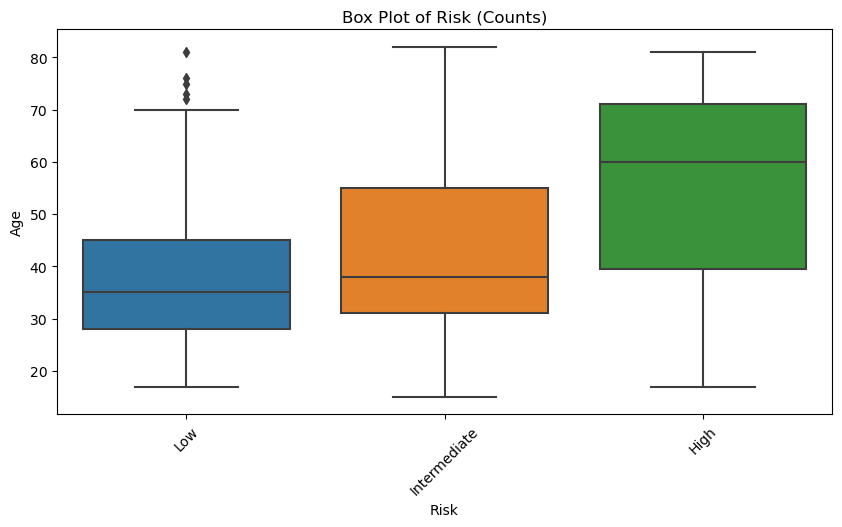

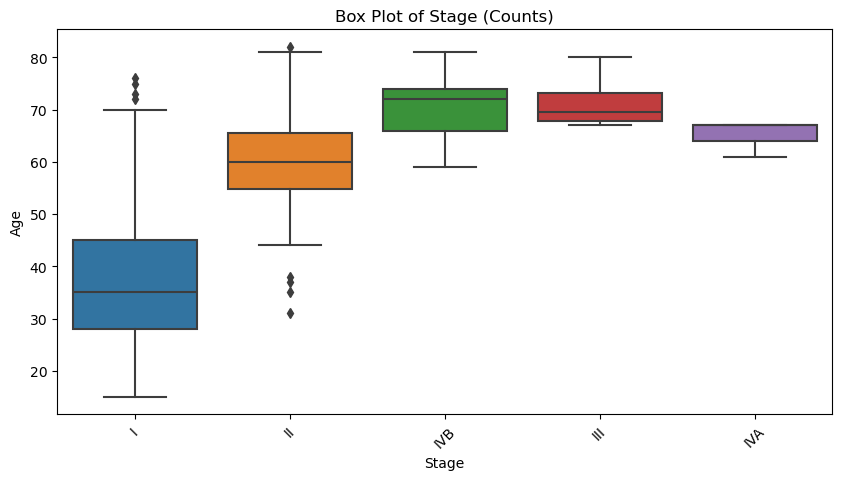

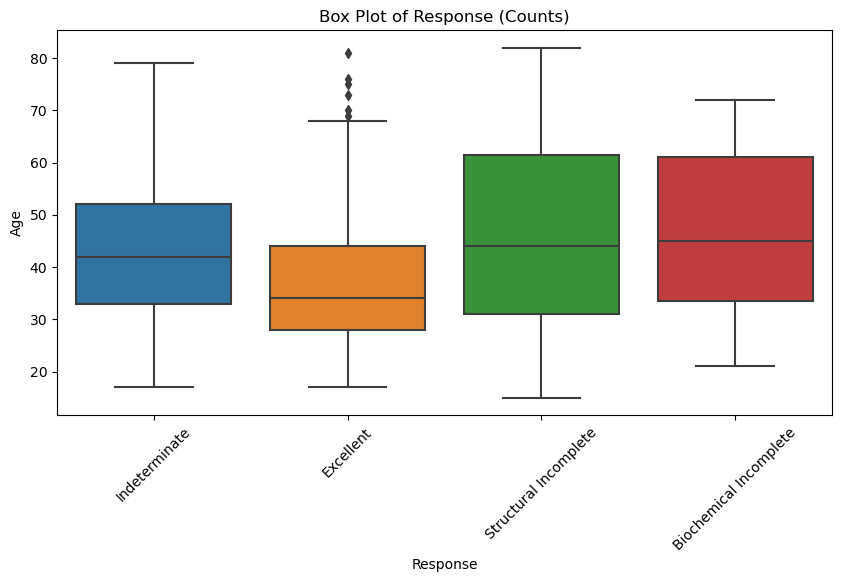

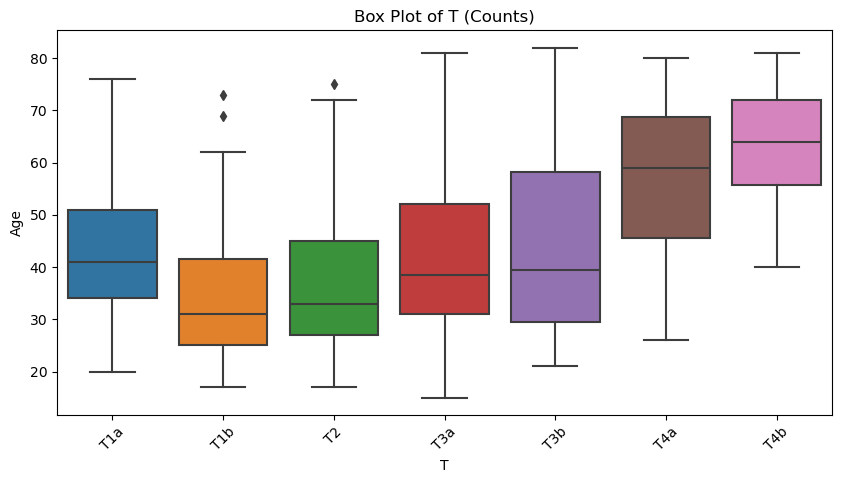

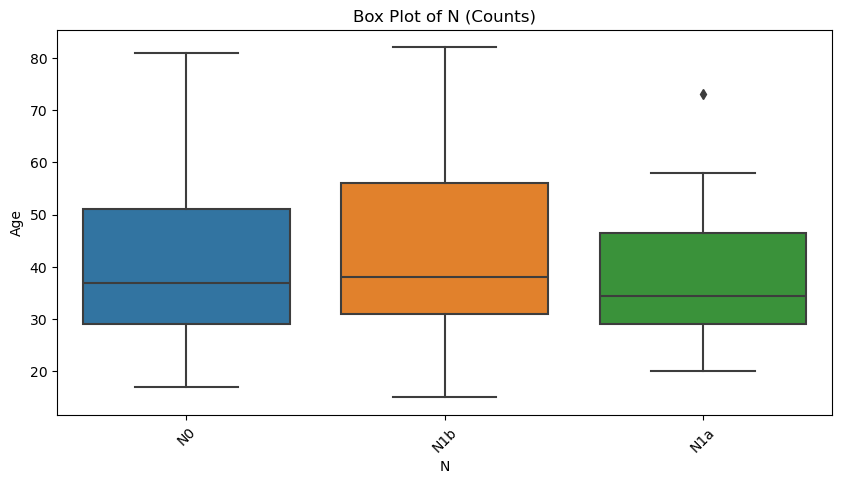

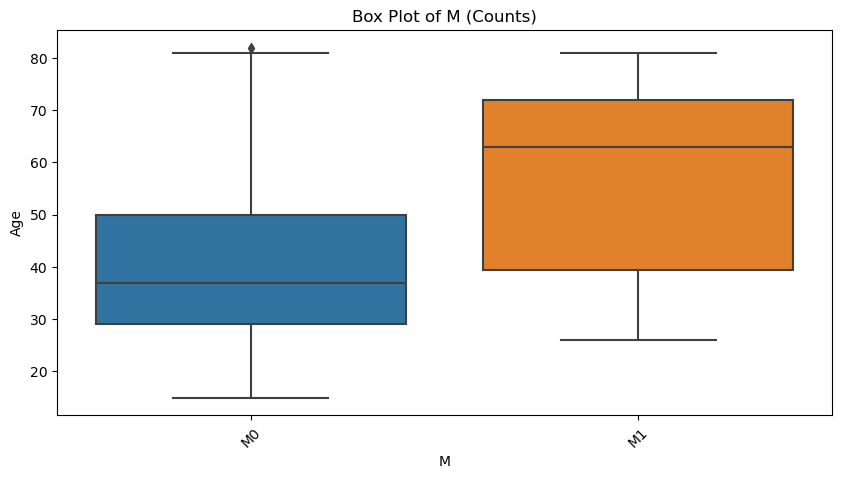

In [3]:
plt.figure(figsize=(15, 10))
data_boxplot = data.drop(columns=['Recurred'])


for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data_boxplot, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()


for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature], y=data['Age'])  # Example of plotting numerical 'Age' against each categorical feature
    plt.title(f'Box Plot of {feature} (Counts)')
    plt.xticks(rotation=45)
    plt.show()